In [35]:
import bootstrap
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# We define a class which imposes a gap in the Z_2-even operator sector.
# The continuum starts at a specified value, and we add an operator between the unitarity bound and this value.
class IsingGap(object):
    bootstrap.cutoff=1e-10
    def __init__(self, gap, sig_values, eps_values):
        # Initialize default input parameters and the gap in the Z2-even operator spectrum.
        self.default_inputs={'dim': 3, 'kmax': 7, 'lmax': 7, 'mmax': 2, 'nmax': 4}
        self.inputs=self.default_inputs
        self.gap=gap
        self.sig_values=sig_values
        self.eps_values=eps_values
        self.results={}
        
    # Determines allowed and disallowed points for whatever the parameters are.
    # Will use defaults if they haven't been manually changed.
    def determine_grid(self):
        
        # We must use a tuple as the dictionary key, as it is immutable.
        key=(self.inputs['dim'], self.inputs['kmax'], self.inputs['lmax'], self.inputs['mmax'], self.inputs['nmax'])
        
        self.results[key]=[[],[],[],[]]        
        
        tab1=bootstrap.ConformalBlockTable(key[0],key[1],key[2],key[3],key[4])
        tab2=bootstrap.ConvolvedBlockTable(tab1)
        
        for sig in self.sig_values:
            for eps in self.eps_values:
                
                sdp=bootstrap.SDP(sig,tab2)
                sdp.set_bound(0,float(self.gap))
                sdp.add_point(0,eps)
                result=sdp.iterate()
                
                if result:
                    self.results[key][0].append(sig)
                    self.results[key][1].append(eps)
                else:
                    self.results[key][2].append(sig)
                    self.results[key][3].append(eps)

    # This method will append to the results dictionary with the desired values of an input parameter.
    # We needn't populate an entire results dictionary at one.
    # This is wasteful as we probably don't need all results at a single time.
    
    def iterate_parameter(self, par, par_range):
        if type(par_range)==int:
            par_range=[par_range]
        for x in par_range:
            self.inputs[par]=x
            self.determine_grid()
        self.inputs=self.default_inputs

    # Method for plotting. Should take a list of tuples as inputs and plot the grid corresponding to each input key.        
    def plot_grids(self, inputs):
        pdf_pages = PdfPages('my-fancy-document.pdf')

        nb_plots=len(inputs)
        nb_plots_per_page=4
        nb_pages=int(np.ceil(nb_plots / float(nb_plots_per_page)))
        grid_size=(2,2)
        
        for i in range(nb_plots):
            if i%nb_plots_per_page==0:
                fig=plt.figure(figsize=(8.27,11.69), dpi=100)
            
            plt.subplot2grid(grid_size, (i%grid_size[0], i%grid_size[1]))

            allowed_sig=self.results[inputs[i]][0]
            allowed_eps=self.results[inputs[i]][1]
            disallowed_sig=self.results[inputs[i]][2]
            disallowed_eps=self.results[inputs[i]][3]

            plt.plot(allowed_sig, allowed_eps, 'r+')
            plt.plot(disallowed_sig, disallowed_eps, 'b+')
#            plt.title('dim='+str(inputs[i][0])+' kmax='+str(inputs[i][1])+' lmax='+str(inputs[i][2])+' mmax='+str(inputs[i][3])+' nmax='+str(inputs[i][3])
            
            if (i + 1) % nb_plots_per_page == 0 or (i + 1) == nb_plots:
                plt.tight_layout()
                pdf_pages.savefig(fig)
                
        pdf_pages.close()

In [36]:
sig_set=np.arange(0.5,0.85,0.05)
eps_set=np.arange(1.0,2.2,0.2)
ising_gap=IsingGap(3.0, sig_set, eps_set)
n_range=np.arange(1,4,1)
ising_gap.iterate_parameter('nmax',n_range)

/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:952: RuntimeWarning: invalid value encountered in subtract
  product *= x - (p - shift)
/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:953: RuntimeWarning: invalid value encountered in add
  return (base ** (x + shift)) / product


In [ ]:
ising_gap.results

In [37]:
keys_eg=[(3,7,7,2,1), (3,7,7,2,2), (3,7,7,2,3)]
ising_gap.plot_grids(keys_eg)

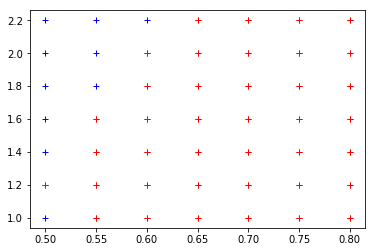

In [34]:
allowed_sig=ising_gap.results[(3,7,7,2,1)][0]
allowed_eps=ising_gap.results[(3,7,7,2,1)][1]
disallowed_sig=ising_gap.results[(3,7,7,2,1)][2]
disallowed_eps=ising_gap.results[(3,7,7,2,1)][3]

plt.plot(allowed_sig, allowed_eps, 'r+')
plt.plot(disallowed_sig, disallowed_eps, 'b+')
plt.show()